<a href="https://colab.research.google.com/github/pavrmk/deep_learning/blob/main/building_a_neural_network_from_scratch/Feed_Forward_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Implementing a Feed-Forward-Network

In [1]:
import numpy as np
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

X, y = make_moons(n_samples=50, noise=0.2, random_state=42)

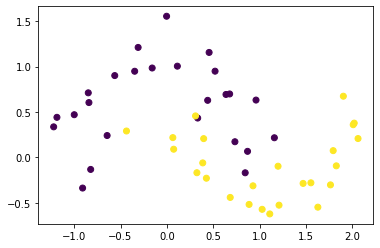

In [2]:
plt.scatter(X[:,0],X[:,1], c=y)

In [3]:
# Function to add bias

def add_bias(X):
    X = np.hstack([X, np.ones((X.shape[0], 1))])
    return X

# Overwriting X with added bias

X = add_bias(X)

In [4]:
# Function to calculate the sigmoid activation function

def sigmoid(X):
    return 1 / (1 + np.exp(-X))

In [5]:
a = np.array([-10.0, -1.0, 0.0, 1.0, 10.0])
expected = np.array([0.0, 0.27, 0.5, 0.73, 1.0])
assert np.all(sigmoid(a).round(2) == expected)

Refer again to the image of network we’re trying to build. What about all the neural connections / arrows? Those are our weights.

These weights should also be represented by NumPy arrays, since they will multiplied (vector-matrix multiplication) by input values before getting passed into an activation function.

Initialize the network with random weights (for both the hidden and output layers).

In [6]:
num_rows, num_cols = X.shape
print(num_rows, num_cols)

50 3


In [7]:
#w1 = np.random.rand(3,2) #weights hidden
#w2 = np.random.rand(3,1) #weights output

# Writing the function to get random weights

def get_random_weights(n_neurons, n_features):
    """
    Calculates randomized weights for multiple features and neurons 
    from a normal distribution.
    """
    return np.random.normal(size=(n_neurons, n_features))

# Creating weight 1 and weight 2

w1 = get_random_weights(3,2)
w2 = get_random_weights(3,1)

In [8]:
# Writing the feed_forward function

def feed_forward(X,w1,w2):
  ''' 
  STEP 1. calculate the dot product of X (shape of (50,3))
  and the weights of the first layer (shape of (3, 2))
  this results in an output shape of (50, 2)
  '''
  step1 = np.dot(X, w1)


  '''
  STEP 2. apply the sigmoid function on the result
  (applying the sigmoid function on a 50x2 matrix outputs the same shape.
  '''
  step2 = sigmoid(step1)


  '''
  STEP 3. append an extra 1 for the bias to the result
  (this results in a 50x3 matrix)
  '''
  #step3 = np.hstack([step2, np.ones((step2.shape[0], 1))])
  step3 = add_bias(step2)
    

  '''
  STEP 4. calculate the dot product of X (from step 3) (shape of (50, 3))
  and the weights of the second layer (shape of (3, 1)). 
  This results in an output shape of (50, 1)
  '''
  step4 = np.dot(step3, w2)


  '''
  STEP 5. apply the sigmoid function on the result
  '''
  step5 = sigmoid(step4)

    
  '''
  STEP 6. return all intermediate results
  '''
  return step2, step5

feed_forward(X, w1, w2)

(array([[0.67790282, 0.84884132],
        [0.38247378, 0.18058369],
        [0.5437676 , 0.54657263],
        [0.39156849, 0.33091585],
        [0.71034526, 0.83366914],
        [0.44597355, 0.55532555],
        [0.56278417, 0.53804506],
        [0.63298622, 0.6739151 ],
        [0.49228897, 0.36823895],
        [0.64703858, 0.67816956],
        [0.6558522 , 0.83582845],
        [0.53490019, 0.64743224],
        [0.38403282, 0.24283848],
        [0.61253747, 0.79262205],
        [0.50643841, 0.4919944 ],
        [0.57500624, 0.6428795 ],
        [0.34236661, 0.16225398],
        [0.40228856, 0.42103549],
        [0.40145513, 0.4153685 ],
        [0.70431788, 0.85622933],
        [0.57035273, 0.70162438],
        [0.71212689, 0.89742444],
        [0.61142137, 0.48200009],
        [0.4432792 , 0.26703083],
        [0.51503197, 0.43900969],
        [0.45732366, 0.34427283],
        [0.35493363, 0.21314652],
        [0.57763632, 0.59037716],
        [0.39564636, 0.19940832],
        [0.573

In [9]:
# Write a loss function

def log_loss(ytrue, ypred):
    loss = -(ytrue * np.log(ypred) + (1 - ytrue)* np.log(1 - ypred))
    return loss

In [10]:
# Testing the loss function

ytrue = np.array([0.0, 0.0, 1.0, 1.0])
ypred = np.array([0.01, 0.99, 0.01, 0.99])
expected = np.array([0.01, 4.61, 4.61, 0.01])
assert np.all(log_loss(ytrue, ypred).round(2) == expected)

### Getting Initial Loss

Run your feed-forward function, and try getting an array of log-loss values for each of your data points, compared to the actual labels. Note that you’ll need to reshape the ytrue values from a (N, ) array to a (N, 1) array (e.g. both the prediction and the actual values should be (50,1)). Make sure the shape of the loss values is also (N,1).

In [11]:
# Getting Initial Loss

out1, out2 = feed_forward(X, w1, w2)
hidden_output = out1
yhat = out2
ytrue = y.reshape(-1, 1)
log_loss(ytrue, yhat) 

array([[1.37855755],
       [0.51537202],
       [0.3791593 ],
       [0.45823481],
       [1.37074595],
       [0.38063863],
       [0.38098403],
       [0.3379948 ],
       [0.44008054],
       [1.25329822],
       [1.3668178 ],
       [1.2211599 ],
       [0.49119375],
       [1.33115628],
       [1.11374108],
       [1.22184871],
       [0.52485159],
       [0.42620045],
       [0.4281682 ],
       [1.3866552 ],
       [1.26229487],
       [1.4178546 ],
       [1.1167249 ],
       [0.47900728],
       [0.41491695],
       [1.01471475],
       [0.5041332 ],
       [0.36442257],
       [0.50728168],
       [1.26408296],
       [0.34563988],
       [1.37317134],
       [0.47281538],
       [1.0728836 ],
       [1.32059646],
       [1.08853161],
       [0.49363277],
       [0.49616586],
       [1.16664396],
       [0.50875735],
       [1.44251831],
       [1.34043972],
       [1.35057204],
       [0.45170344],
       [1.33398728],
       [1.26374819],
       [0.48160232],
       [1.382

### Writing a Backpropagation Function

In [12]:
sig_deriv_2 = hidden_output * ( 1 - hidden_output)
sig_deriv_2.shape

ytrue = y.reshape(-1, 1)
loss = log_loss(ytrue , yhat)
error = (yhat - ytrue)# * loss
sig_deriv = yhat * (1 - yhat)
y_grad = sig_deriv * error
error.shape

(50, 1)

In [13]:
def backprop(weights,
             out1,
             out2,
             ytrue,
             X,
             LR):

    ytrue = y.reshape(-1, 1)
    wH = weights[0]
    wO = weights[1]

    '''
    EQUATION A: error=(y^−ytrue)×loss
    '''
    loss = log_loss(ytrue , yhat)
    error = (yhat - ytrue) * loss

    '''
    EQUATION B: ∇y=act′(Ho⋅ωo)×error
    '''
    hidden_out_with_bias = add_bias(hidden_output)
    #don't forget the bias!
    sig_deriv = yhat * (1 - yhat)
    #derivative of the sigmoid function with respect to the
    #hidden output * weights
    y_grad = sig_deriv * error

    '''
    EQUATION C: Δωo=−(∇y⋅Ho)×LR
    '''
    #gradient = sig_deriv * error
    #delta_wo = -np.dot(gradient, hidden_out_with_bias) * LR
    delta_wo = -np.dot(y_grad.T, hidden_out_with_bias) * LR

    #and finally, old weights + delta weights -> new weights!
    wO_new = wO + delta_wo.T

    '''
    EQUATION D: ∇H=act′(X⋅ωh)×(∇y⋅ωo)
    '''
    sig_deriv_2 = hidden_output * ( 1 - hidden_output)
    #gradient = gradient.reshape(50, 1)
    H_grad = sig_deriv_2[:,:2]  * np.dot(y_grad, wO[:-1].T)
    #                      ^^ remove bias              ^^ remove bias
    #exclude the bias (last column) of the outer weights,
    #since it is not backpropagated!
    assert H_grad.shape == (50, 2)

    '''
    EQUATION E: Δωh=−(∇H⋅X)×LR
    '''
    delta_wH = -np.dot(H_grad.T, X).T * LR
    wH_new = wH + delta_wH#.T
    #old weights + delta weights -> new weights!

    # new hidden weights, new output weights
    return wH_new, wO_new

### Running the Backpropagation Algorithm

[0.31033441]
[0.37705361]
[0.39549539]
[0.40345576]
[0.4104468]
[0.4179527]
[0.42613988]
[0.43495455]
[0.44429294]
[0.45403293]
[0.46404592]
[0.47420535]
[0.48439328]
[0.49450512]
[0.50445236]
[0.51416349]
[0.52358358]
[0.53267296]
[0.54140531]
[0.54976559]
[0.55774789]
[0.56535355]
[0.57258938]
[0.57946624]
[0.58599779]
[0.59219953]
[0.59808806]
[0.60368044]
[0.60899377]
[0.61404489]
[0.61885009]
[0.62342502]
[0.62778453]
[0.63194267]
[0.63591262]
[0.63970672]
[0.64333646]
[0.64681254]
[0.65014488]
[0.65334268]
[0.65641444]
[0.65936802]
[0.6622107]
[0.66494919]
[0.66758968]
[0.67013792]
[0.67259918]
[0.67497836]
[0.67727997]
[0.67950822]
[0.68166696]
[0.68375979]
[0.68579003]
[0.68776079]
[0.68967492]
[0.6915351]
[0.69334382]
[0.69510339]
[0.69681599]
[0.69848363]
[0.70010822]
[0.70169151]
[0.70323519]
[0.70474081]
[0.70620984]
[0.70764368]
[0.70904361]
[0.71041088]
[0.71174665]
[0.71305203]
[0.71432804]
[0.71557569]
[0.7167959]
[0.71798957]
[0.71915755]
[0.72030062]
[0.72141956]
[0.7

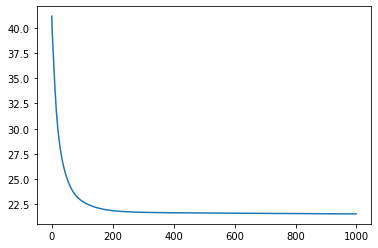

In [19]:
# setup
#X, y = make_moons(n_samples=200, noise=0.1, random_state=42)
#X = add_bias(X)
#y = y.reshape(-1, 1)
#w1 = get_random_weights(3,2)
#w2 = get_random_weights(3,1)
weights = [
   np.random.normal(size=(3, 2)),
   np.random.normal(size=(3, 1))
]

# train

LOSS_VEC = []
LR = 0.1

for i in range(1000):
    out1, out2 = feed_forward(X, weights[0], weights[1])
    yhat = out2
    loss = log_loss(ytrue, yhat).sum()
    LOSS_VEC.append(loss)
    new_weights = backprop(weights, out1, out2, ytrue, X, LR)
    weights = new_weights
    print(out2[1])

plt.plot(LOSS_VEC)